# Plots and figures for paper

This notebook contains all code needed to reproduce the plots and figures from the paper. First we print the idle energy, then we dive into the energy consumption of models trained on anonymised data using $k$-anonymity and on models trained on synthetic data. All cells should have sufficient comments and documentation to be understood, if not feel free to reach out!

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn import preprocessing
from matplotlib.lines import Line2D
from scipy.stats import mannwhitneyu

## Energy consumption of the machine itself

In [2]:
# read data file
df = pd.read_csv('Energy/Energy_idle.csv')
df.columns = ['label','timestamp','duration','pkg','dram','socket']

# show average duration of idle measurements
duration = df['duration'].mean()

# take energy consumption of CPU and DRAM
pkg = df['pkg'].mean()
dram = df['dram'].mean()

# convert to seconds and Joules
duration *= (10**-6)
pkg *= (10**-6)
dram *= (10**-6)

# print results
print(f"Average duration for idle: {round(duration, 3)} in seconds")
print(f"Average pkg for idle: {round(pkg, 3)} in Joules")
print(f"Average dram for idle: {round(dram, 3)} in Joules")
print(f"total energy used: {round(pkg, 3) + round(dram, 3)} per second")

Average duration for idle: 1.001 in seconds
Average pkg for idle: 6.235 in Joules
Average dram for idle: 1.277 in Joules
total energy used: 7.5120000000000005 per second


## Energy consumption of the experiments on anonymised data using $k$-anonymity

In [3]:
def markers():
    """
    Create markers to help visualise the data
    """
    marker_dict = {}
    marker_list = []

    for key, value in Line2D.markers.items():
        if value != 'nothing':
            marker_dict[key] = value
            marker_list.append(key)
    
    return marker_dict, marker_list

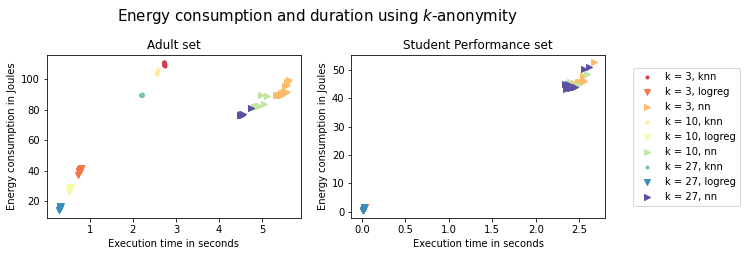

In [4]:
# list model, k-values and data sets
models = ['knn','logreg','nn']
ks = [3,10,27]
datasets = ['Adult', 'Student']

# use markers and colors for plot
markers_list = markers()[1][::3]
colors = [plt.cm.Spectral(each) for each in np.linspace(0.1, 1, 9)]
index = 0

# create dual-plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

# loop over data, k-values and models
for data in datasets:
    index = 0
    for k in ks:
        index_mark = 0
        
        for model in models:
            # read energy consumption by looking for label
            df = pd.read_csv('Energy/Energy_'+str(model)+'.csv')
            label_sought = str(data) + '_' + str(k)
            df = df.loc[df['label'] == label_sought]

            """
            Plot in right side depending on Adult / Student Performance
            Convert to seconds and Joules (10**-6).
            Use duration, and sum PKG and DRAM for total energy consumption
            """
            if data == 'Adult':
                ax1.scatter(df['duration']* (10**-6), (df['pkg']* (10**-6)+df['dram']* (10**-6)), label=f'k = {k}, {model}', marker=markers_list[index_mark], color=colors[index])
            else:
                ax2.scatter(df['duration']* (10**-6), (df['pkg']* (10**-6)+df['dram']* (10**-6)), label=f'k = {k}, {model}', marker=markers_list[index_mark], color=colors[index])

            index += 1
            index_mark += 1

# legend
plt.legend(bbox_to_anchor=(1.55, 0.95))

# set labels for readability
ax1.set_xlabel('Execution time in seconds')
ax1.set_ylabel('Energy consumption in Joules')
ax2.set_xlabel('Execution time in seconds')
ax2.set_ylabel('Energy consumption in Joules')

# plot
fig.suptitle('Energy consumption and duration using $k$-anonymity', fontsize=15, y=1.1)
ax1.set_title("Adult set")
ax2.set_title("Student Performance set")
plt.show()
# plt.savefig('k-anon.png')

## Then the energy consumption of the experiments on synthetic data

/var/folders/11/yrj1djtx66v8pmqdknyqpq0m0000gn/T/ipykernel_51888/2437427814.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


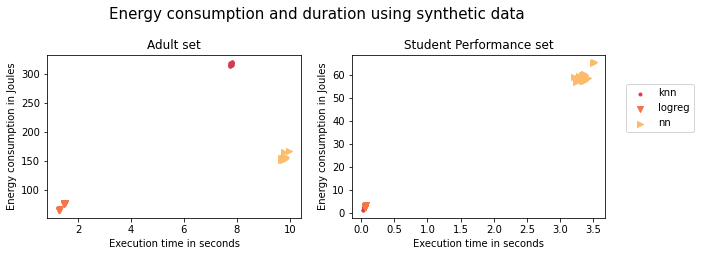

In [5]:
# proceed to other folder for synthetic data
os.chdir("../Synthetic_data/")

# use markers and colors again
markers_list = markers()[1][::3]
colors = [plt.cm.Spectral(each) for each in np.linspace(0.1, 1, 9)]
index = 0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

# loop over data and k-values
for data in datasets:
    index = 0
    index_mark = 0

    for model in models:
        # read energy consumption by looking for label
        df = pd.read_csv('Energy/Energy_'+str(model)+'.csv')
        df = df.loc[df['label'] == data]

        """
        Plot in right side depending on Adult / Student Performance
        Convert to seconds and Joules (10**-6).
        Use duration, and sum PKG and DRAM for total energy consumption
        """
        if data == 'Adult':
            ax1.scatter(df['duration']* (10**-6), (df['pkg']* (10**-6)+df['dram']* (10**-6)), label=f'{model}', marker=markers_list[index_mark], color=colors[index])
        else:
            ax2.scatter(df['duration']* (10**-6), (df['pkg']* (10**-6)+df['dram']* (10**-6)), label=f'{model}', marker=markers_list[index_mark], color=colors[index])

        index += 1
        index_mark += 1
            
# legend
plt.legend(bbox_to_anchor=(1.37, 0.85))

# set labels for readability
ax1.set_xlabel('Execution time in seconds')
ax1.set_ylabel('Energy consumption in Joules')
ax2.set_xlabel('Execution time in seconds')
ax2.set_ylabel('Energy consumption in Joules')

# plot
fig.suptitle('Energy consumption and duration using synthetic data', fontsize=15, y=1.1)
ax1.set_title("Adult set")
ax2.set_title("Student Performance set")
fig.show()
# fig.savefig('synthetic.png')